## A synthetic DC/IP model

Tina yesterday suggested a synthetic model that is kind of a mix inspired by both the Mjölkalunga (sediments) and Odarslöv (Dike). We have three main layers:
* 2 metres of dry sand
* 8 metres of saturated sand (aquifer)
* clay basement
plus two anomalies:
* a (silty?) block in the sand
* a near-vertical dyke

Assume a Terrameter LS2 measurement with 81 electrodes using the multiple-gradient array.

![Model](model.png)

In [45]:
# We first import the needed modules
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt  # submodule of pg
from pygimli.physics import ert  # subsubmodule

(<Axes: >, None)

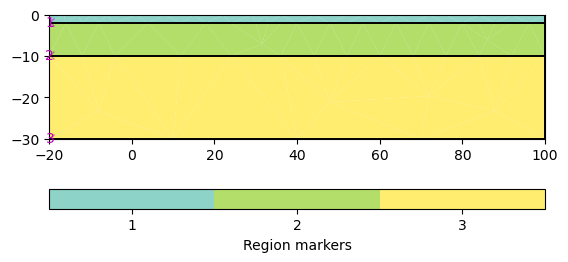

In [46]:
# We create a world with three layers
world = mt.createWorld(start=[-20, -30], end=[100, 0], layers=[-2, -10])
pg.show(world);

(<Axes: >, None)

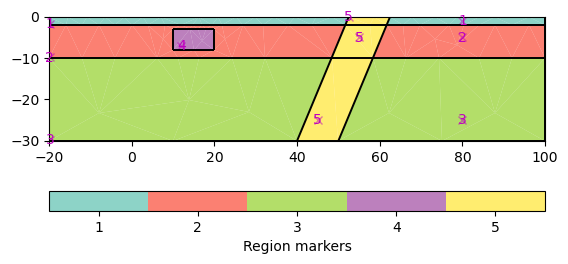

In [47]:
ano = mt.createRectangle(start=[10, -8], end=[20, -3], marker=4)
points = [[52.5, 0], [62.5, 0], [50, -30], [40, -30]]
dike = mt.createPolygon(points, isClosed=True, marker=5)
geo = world + ano + dike
geo.addRegionMarker([80, -1], marker=1)
geo.addRegionMarker([80, -5], marker=2)
geo.addRegionMarker([80, -25], marker=3)
geo.addRegionMarker([55, -5], marker=5)
geo.addRegionMarker([45, -25], marker=5)
pg.show(geo)

Data: Sensors: 81 data: 1260, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'valid']


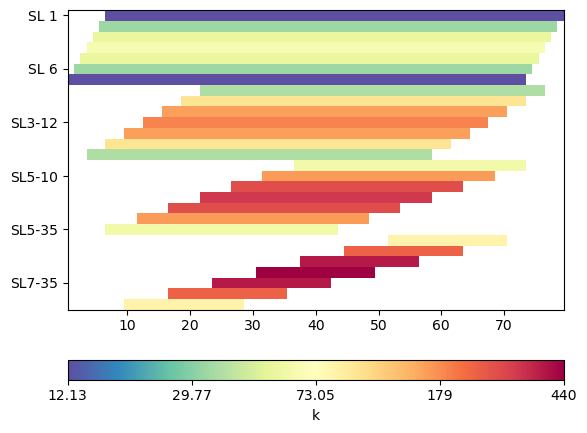

In [48]:
scheme = ert.createData(elecs=81, schemeName="gr")
scheme["k"] = ert.geometricFactors(scheme)
ert.show(scheme, "k")
print(scheme)

In [49]:
print(geo)
for sensor in scheme.sensors():
    geo.createNodeWithCheck(sensor)
print(geo)


Mesh: Nodes: 16 Cells: 0 Boundaries: 20
Mesh: Nodes: 97 Cells: 0 Boundaries: 20


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x225d05cfe20>)

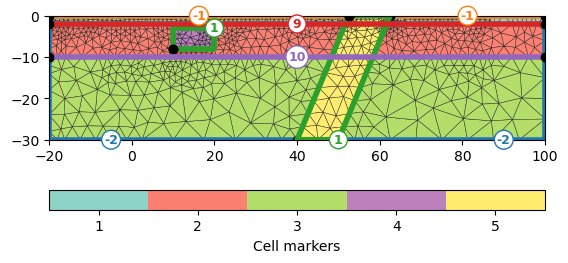

In [50]:
mesh = mt.createMesh(geo, quality=34)
pg.show(mesh, markers=True, showMesh=True)

In [51]:
np.unique(mesh.cellMarkers())

array([1, 2, 3, 4, 5])

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x225d0460ac0>)

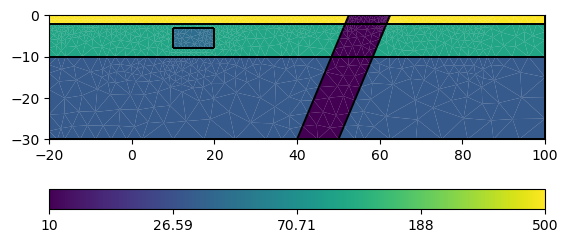

In [52]:
resmap = [[1, 500], # dry sand
          [2, 100], # saturated sand
          [3, 30],  # clay
          [4, 40],  # silt
          [5, 10]]  # dike
pg.show(mesh, resmap, logScale=True)

Data error estimate (min:max)  0.030002361258508265 : 0.03889033681180257


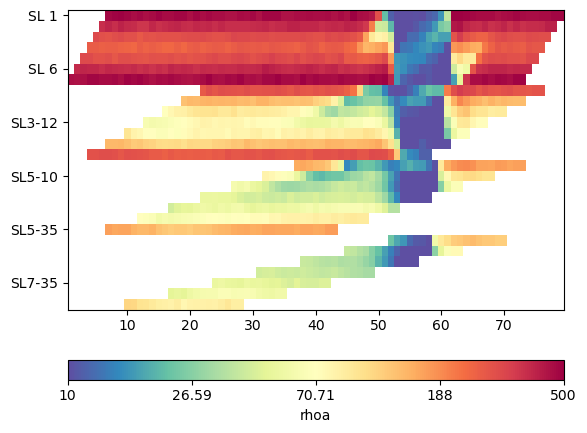

In [56]:
data = ert.simulate(mesh=mesh, scheme=scheme, res=resmap, noiseLevel=0.03)
ax, cb = ert.show(data, cMin=10, cMax=500)

In [63]:
mgr = ert.Manager(data)
mgr.invert(zWeight=0.2, verbose=True)

05/06/23 - 19:12:39 - pyGIMLi - INFO - Found 2 regions.
05/06/23 - 19:12:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
05/06/23 - 19:12:39 - pyGIMLi - INFO - Found 2 regions.
05/06/23 - 19:12:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
05/06/23 - 19:12:39 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/06/23 - 19:12:39 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
05/06/23 - 19:12:39 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3369 Cells: 6328 Boundaries: 4950
05/06/23 - 19:12:40 - pyGIMLi - INFO - Use median(data values)=125.43572295785484
05/06/23 - 19:12:40 - pyGIMLi - INFO - Created startmodel from forward operator: 1318 [125.43572295785484,...,125.43572295785484]
05/06/23 - 19:12:40 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000225E11B2B80>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000225E11B2CC0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000225D4A92F40>
min/max (data): 4.29/523
min/max (error): 3%/3.89%
min/max (start model): 125/125
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 68.28 (dPhi = 95.58%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 36.31 (dPhi = 47.16%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 16.04 (dPhi = 55.16%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 6.23 (dPhi = 59.56%) lam: 20.0
--------------------------------------

1318 [460.6381975432918,...,25.32213576020455]

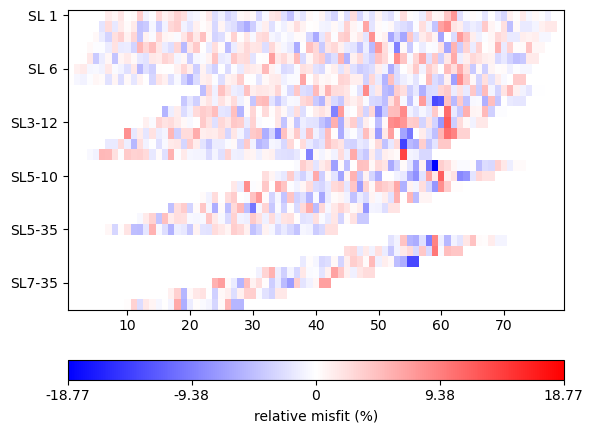

In [64]:
mgr.showMisfit()

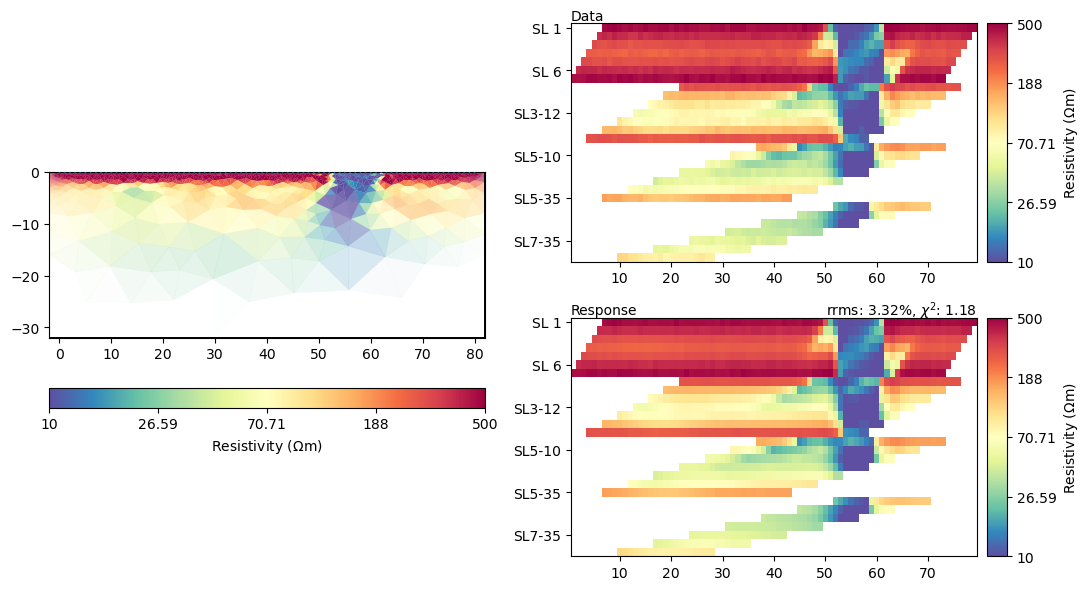

In [66]:
fig = mgr.showResultAndFit(cMin=10, cMax=500)